## **Stock Movement Analysis Based on Social Media Sentiment**

**Objective:**

Analyze and predict stock movements by extracting and analyzing social media data from telegram The task involves scraping relevant data,
performing sentiment analysis, extracting key features, and using them to provide

insights into potential stock price trends.

Install all the main libraries required for this task

In [ ]:
!pip install telethon nltk pandas matplotlib seaborn wordcloud yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.2/620.2 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for telethon: filename=Telethon-1.37.0-py3-none-any.whl size=694366 sha256=2ddf51149619a841611c2795c0030c0581f27334c3c4f591a881a3693b07ff79
  Stored in directory: /root/.cache/pip/wheels/8b/3c/0a/91d35499092d78120d71039a156b5c450f3ca00f95b4d594a4
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=2f48e0e4931f1ed9552ba702632c4c465bc578ff1c43069acf45d63ebd4a39ac
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built telethon pyaes


In [ ]:
pip install textblob


In [ ]:
pip install vaderSentiment pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install emoji
!pip install urlextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.6 MB/s eta 0:00:00


In [ ]:
pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.0 MB/s eta 0:00:00


**asyncio** is used for handling asynchronous tasks, allowing real-time data collection from Telegram without blocking the code execution.

In [ ]:
import asyncio

This block imports necessary libraries and initializes the Telegram client using the Telethon library. It connects to the Telegram API using your unique api_id, api_hash, and phone_number from my.telegram.org, allowing you to interact with Telegram channels and retrieve data for further analysis.

In [ ]:
from telethon.sync import TelegramClient
import pandas as pd

# Replace with your own values from my.telegram.org
api_id = '27003472'  # Your API ID
api_hash = '00d1ca96d77fc355f0410ba92fcb3549'  # Your API Hash
phone_number = '7696014968'  # Your phone number registered with Telegram

# Create the client and connect
client = TelegramClient('session_name', api_id, api_hash)




In [ ]:
import pandas as pd
import re
from emoji import demojize
from textblob import TextBlob
from urlextract import URLExtract
from datetime import datetime
from telethon import TelegramClient
import getpass
# Initialize URL extractor
extractor = URLExtract()

# Function to clean and preprocess messages
def clean_message(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove special characters, mentions (@username), hashtags, and newlines
    text = re.sub(r'\@\w+|\#|\n|\r', '', text)

    # Remove emojis
    text = demojize(text)

    # Convert text to lowercase for consistency
    text = text.lower()

    return text

This above block imports necessary libraries for cleaning and preprocessing messages, including removing URLs, special characters, and emojis. It also defines a function to clean and standardize the text for sentiment analysis.

In [ ]:
# Function to extract hashtags from text
def extract_hashtags(text):
    # Find all hashtags in the text
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

In [ ]:
# Async function to fetch and process messages
async def main():
    # Securely input your phone number without displaying it
    phone_number = getpass.getpass(prompt="Enter your phone number: ")

    # Initialize the Telegram Client
    client = TelegramClient('session_name', api_id, api_hash)
    await client.start(phone_number)

    print("Client Created")

    # Specify the channel username here
    channel_username = 'stocks'  # Replace with actual Telegram channel

    # Fetch messages from the Telegram channel
    messages = await client.get_messages(channel_username, limit=5000)

    # Create a list to store message data
    messages_data = []

    if not messages:
        print("No messages found in the channel.")
        return

    for message in messages:
        if message.message:  # Process only if there is a message (text content)
            clean_text = clean_message(message.message)  # Clean the message
            hashtags = extract_hashtags(message.message)  # Extract hashtags

            # Add to the dataset
            messages_data.append({
                'id': message.id,
                'date': message.date.strftime('%Y-%m-%d'),
                'text': clean_text,
                'message_length': len(clean_text),
                'hashtags': hashtags,
            })

    # Create a DataFrame from the list
    df_messages = pd.DataFrame(messages_data)

    # Clean and preprocess the text data
    df_messages['text'] = df_messages['text'].apply(clean_message)

    # Handle Missing Values
    df_messages.dropna(subset=['text'], inplace=True)

    # Remove duplicates
    df_messages.drop_duplicates(subset=['text'], keep='first', inplace=True)

    # Optionally reset the index after dropping rows
    df_messages.reset_index(drop=True, inplace=True)

    # Display the cleaned DataFrame
    print(f"Total messages after cleaning: {len(df_messages)}")
    print(df_messages.head())  # Display the first few rows of the cleaned DataFrame

    # Save the cleaned DataFrame to a CSV file
    df_messages.to_csv('Stock_Movement.csv', index=False)
    print("Stock_Movement.csv saved successfully.")

# Run the main function in an existing event loop
async def run():
    await main()

# Execute the function
await run()

Enter your phone number: ··········


OperationalError: database is locked

The above block defines a function that uses regular expressions to find and extract all hashtags from the given text.

In [5]:
async def main():
    await client.start()
    print("Client Created")

    # Specify the channel username here
    channel_username = 'stocks'  # Replace with actual Telegram channel

    # Fetch messages from the Telegram channel
    messages = await client.get_messages(channel_username, limit=5000)

    # Create a list to store message data
    messages_data = []

    # Check if messages are being fetched
    if not messages:
        print("No messages found in the channel.")
        return

    for message in messages:
        if message.message:  # Process only if there is a message (text content)
            clean_text = clean_message(message.message)  # Clean the message


            # Extract hashtags
            hashtags = extract_hashtags(message.message)  # Extract hashtags from the original message


            # Add to the dataset
            messages_data.append({
                'id': message.id,
                'date': message.date.strftime('%Y-%m-%d'),  # Store date in 'YYYY-MM-DD' format
                'text': clean_text,
                'message_length': len(clean_text),  # Length of the cleaned message
                'hashtags': hashtags,  # List of hashtags mentioned
            })

    # Create a DataFrame from the list
    df_messages = pd.DataFrame(messages_data)

    # Clean and preprocess the text data
    df_messages['text'] = df_messages['text'].apply(clean_message)

    # Handle Missing Values
    df_messages.dropna(subset=['text'], inplace=True)

    # Remove duplicates
    df_messages.drop_duplicates(subset=['text'], keep='first', inplace=True)

    # Optionally reset the index after dropping rows
    df_messages.reset_index(drop=True, inplace=True)

    # Display the cleaned DataFrame
    print(f"Total messages after cleaning: {len(df_messages)}")
    print(df_messages.head())  # Display the first few rows of the cleaned DataFrame

    # Save the cleaned DataFrame to a CSV file
    df_messages.to_csv('Stock_Movement.csv', index=False)
    print("Stock_Movement.csv")

# Run the main function in an existing event loop
async def run():
    await main()

# Execute the function
await run()


Please enter your phone (or bot token): ··········
Please enter the code you received: 47569
Signed in successfully as Vishali Sharma; remember to not break the ToS or you will risk an account ban!
Client Created
Total messages after cleaning: 803
    id        date                                               text  \
0  903  2024-10-07  :united_states: stock market today: dow, s&p 5...   
1  902  2024-10-07  :india: silicon on insulator market forecast 2...   
2  901  2024-10-06  :united_states: acrylic teeth market size is p...   
3  900  2024-10-06   :india: stock market live updates: gift nifty...   
4  899  2024-10-05  :united_states: private equity-backed texas ho...   

   message_length hashtags  
0            1167       []  
1            1029       []  
2            1121       []  
3            1068       []  
4            1028       []  
Stock_Movement.csv


The above  code connects to a Telegram channel, fetches 5000 messages, cleans the text, extracts hashtags, and stores the processed data in a DataFrame. It removes missing values and duplicates, then saves the cleaned data to a CSV file named Stock_Movement.csv

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


This code imports necessary libraries, downloads the VADER lexicon from NLTK, and initializes the VADER sentiment analyzer (SentimentIntensityAnalyzer) for sentiment analysis tasks using the nltk library.

In [ ]:
# Function to classify sentiment based on compound polarity score
def classify_sentiment(polarity_scores):
    compound_score = polarity_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

This above function classify_sentiment() takes in polarity scores (generated by a sentiment analyzer) and classifies the sentiment based on the compound score:


If the compound score is ≥ 0.05, it returns 'Positive'.

If the score is ≤ -0.05, it returns 'Negative'.

Otherwise, it returns 'Neutral'.

In [ ]:
#  Load the CSV file containing Telegram messages
df_messages = pd.read_csv('Stock_Movement.csv')

# Replace missing text with an empty string
df_messages['text'] = df_messages['text'].fillna('')

# Perform sentiment analysis for each message and store results
df_messages['polarity'] = df_messages['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Classify the sentiment type (positive, negative, neutral) based on polarity
df_messages['sentiment_type'] = df_messages['polarity'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

This above  code loads a CSV file with Telegram messages, replaces any missing text with an empty string, and applies sentiment analysis to each message using VADER. It calculates the polarity score for each message and classifies the sentiment as 'Positive', 'Negative', or 'Neutral' based on the score.

In [ ]:
# Display the first few rows with text, polarity, and sentiment type
print(df_messages[['text', 'polarity', 'sentiment_type','id']].head(10))

                                                text  polarity sentiment_type  \
0  :united_states: stock market today: dow, s&p 5...    0.2960       Positive   
1  :india: silicon on insulator market forecast 2...    0.1027       Positive   
2  :united_states: acrylic teeth market size is p...    0.1280       Positive   
3  :india: stock market live updates: gift nifty ...    0.5106       Positive   
4  :united_states: private equity-backed texas ho...    0.7351       Positive   
5  :india: commodity markets: all eyes on us infl...   -0.1901       Negative   
6  :united_states: housing market update: more th...    0.3653       Positive   
7  :india: piramal finance raises $150 million fr...   -0.3818       Negative   
8  :united_states: new york stock exchange (nyse)...   -0.2023       Negative   
9  :united_states: national association of securi...    0.4019       Positive   

    id  
0  903  
1  902  
2  901  
3  900  
4  899  
5  898  
6  897  
7  896  
8  895  
9  894  


This code imports the Counter class from the collections module, which is used for counting elements, and the re module for working with regular expressions. These can be used for text processing tasks like counting word frequencies or pattern matching.

In [ ]:
from collections import Counter
import re

In [ ]:
stock_keywords = {
    'AAPL': 'Apple stock',
    'TSLA': 'Tesla stock',
    'GOOG': 'Google stock',
    'MSFT': 'Microsoft stock',
    'AMZN': 'Amazon stock',
    'bullish': 'Positive market sentiment',
    'bearish': 'Negative market sentiment',
    'buy': 'Buy recommendation or positive sentiment',
    'sell': 'Sell recommendation or negative sentiment',
    'profit': 'Indication of gains or positive sentiment',
    'loss': 'Indication of losses or negative sentiment',
    'market': 'General market trend discussion',
    'stock': 'General stock discussion',
    'investment': 'Stock or market investment discussion',
    'short': 'Short-selling or negative sentiment',
    'hold': 'Hold recommendation or neutral sentiment',
    'RELIANCE': 'Reliance Industries Limited',
    'TATA': 'Tata Group',
    'TCS': 'Tata Consultancy Services Limited',
    'INFY': 'Infosys Limited',
    'bse' : 'Bomboy Stock Exchange',
    'war' : 'War',
    'nse' :'National stock exchange',
    'stock market' : 'Stock market',
    'market cap' : 'Market capitalization',
    'stock exchange' : 'Stock exchange',
    'stock price' : 'Stock price',
    'stock performance' : 'Stock performance',
    'price increase' : 'Price increase',
    'price decrease' : 'Price decrease',
    'crypto price' : 'Cryptocurrency price',
    'crypto market' : 'Cryptocurrency market',
    'cryptocurrency exchange' : 'Cryptocurrency exchange',
    'health care' : 'Health care',
    'Meta' : 'company of Facebook, Instagram, and WhatsApp',
    'VOW3' : 'Volkswagen Group',
    'BMW' : 'Bayerische Motoren Werke',
    'NFLX' : 'Netflix',
    'PYPL' : 'PayPal Holdings',
    'NIO' : 'Ningbo NIO Automobile Co., Ltd',
}

# Function to extract mentions of stock tickers or market trends from the text
def extract_stock_mentions(text, keywords):
    mentions = []
    for keyword in keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):  # Match whole words only
            mentions.append(keyword)
    return mentions


The above  code defines a dictionary stock_keywords that maps stock tickers and market-related terms (e.g., 'AAPL', 'bullish', 'sell') to their descriptions. The function extract_stock_mentions() searches a given text for any mentions of these stock tickers or market terms. It checks for whole-word matches (case-insensitive) using regular expressions, and if a match is found, it adds the keyword to a list of mentions. The function then returns this list.

In [ ]:
# Apply the function to extract mentions from each message
df_messages['mentions'] = df_messages['text'].apply(lambda text: extract_stock_mentions(text, stock_keywords))


In [ ]:
# Flatten the list of mentions and count the frequency of each keyword
all_mentions = [mention for mentions in df_messages['mentions'] for mention in mentions]
mentions_count = Counter(all_mentions)

# Display the frequency of each stock or market trend keyword
print("Frequency of Mentions for Specific Stocks or Market Trends:")
for keyword, count in mentions_count.items():
    print(f"{keyword}: {count}")

Frequency of Mentions for Specific Stocks or Market Trends:
market: 482
stock: 424
stock market: 138
buy: 64
TATA: 6
short: 9
war: 6
loss: 379
stock exchange: 282
NIO: 84
TSLA: 270
nse: 98
bse: 102
sell: 53
AAPL: 231
RELIANCE: 5
AMZN: 187
crypto market: 6
bearish: 3
stock price: 2
bullish: 7
profit: 20
Meta: 171
investment: 7
market cap: 13
hold: 3
PYPL: 5
TCS: 2
INFY: 1
MSFT: 5
GOOG: 4
VOW3: 163
NFLX: 3


The above code flattens the list of stock or market trend mentions extracted from the df_messages DataFrame and counts the frequency of each keyword using Counter. It then prints out the frequency of each stock or market trend keyword, showing how many times each keyword was mentioned in the messages.

<ipython-input-19-e37944c7d896>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Future

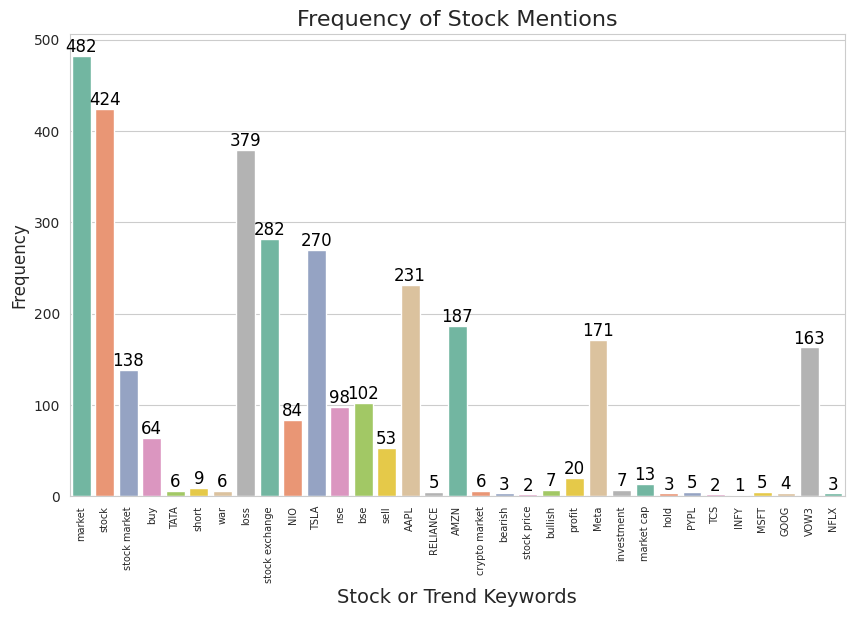

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Use a clean grid style
palette = sns.color_palette("Set2", n_colors=len(mentions_count))  # Create a palette with enough colors
bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)

# Annotate the bars with their values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='bottom', fontsize=12, color='black')

plt.title('Frequency of Stock Mentions', fontsize=16)
plt.xlabel('Stock or Trend Keywords', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=10)
plt.show()

The above code generates a bar plot to visualize stock mentions. It sets up a clean style, uses a color palette, and plots the keywords on the x-axis with their frequencies on the y-axis. The bars are annotated with their values, and the plot includes a title and labeled axes. Finally, the plot is displayed.

In [ ]:
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The above  code imports necessary libraries for topic modeling with LDA, downloads English stopwords using NLTK, and stores them in a set for filtering during text preprocessing.


In [ ]:
# Preprocess the text
def preprocess(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = ''.join(char for char in text if char.isalpha() or char.isspace()).lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above function preprocesses text by removing non-alphabetic characters, converting it to lowercase, and tokenizing it into individual words. It then filters out stopwords, returning the cleaned list of tokens.

In [ ]:
# Apply preprocessing to the messages
df_messages['processed_text'] = df_messages['text'].apply(preprocess)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_messages['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_messages['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above code applies the preprocess function to each message in the df_messages DataFrame and stores the results in a new column processed_text. Then, it creates a dictionary of unique words and a corpus (bag-of-words representation) from the preprocessed text, which are needed for LDA modeling.

In [ ]:
# Build the LDA model
num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display the topics
print("Identified Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

Identified Topics:
Topic 1: 0.058*"price" + 0.054*"hcompany" + 0.039*"top" + 0.019*"stock" + 0.019*"downrightarrow" + 0.019*"uprightarrow" + 0.019*"losers" + 0.019*"gainers" + 0.019*"exchange" + 0.019*"hot"
Topic 2: 0.119*"h" + 0.030*"sponsored" + 0.030*"lovecom" + 0.030*"whiteheart" + 0.030*"w" + 0.029*"trending" + 0.026*"moneybag" + 0.025*"today" + 0.012*"memo" + 0.011*"stocks"
Topic 3: 0.065*"h" + 0.064*"company" + 0.063*"price" + 0.043*"top" + 0.023*"idea" + 0.022*"india" + 0.021*"losers" + 0.021*"gainers" + 0.021*"stocks" + 0.021*"stock"
Topic 4: 0.346*"h" + 0.042*"top" + 0.041*"sponsoredoncomingautomobilevow" + 0.041*"blackcircleamzn" + 0.041*"sportutilityvehicletsla" + 0.031*"whitecircleaapl" + 0.031*"moneybagredapplemeta" + 0.021*"prices" + 0.021*"daily" + 0.016*"chartdecreasingtop"
Topic 5: 0.005*"stocks" + 0.004*"june" + 0.003*"market" + 0.003*"alphaunitedstates" + 0.003*"seeking" + 0.003*"markets" + 0.003*"ahead" + 0.002*"top" + 0.002*"pnb" + 0.002*"stock"
Topic 6: 0.017*"ma

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Interpretation of Topics: Here are some possible interpretations based on your output:

Topic 1:

Common terms: "company," "price," "stock," "losers"
Interpretation: This topic may be discussing stock performance metrics, particularly focusing on companies that are losing value.

Topic 2:

Common terms: "moneybag," "stocks," "new"
Interpretation: This topic could be centered around financial transactions, new stock opportunities, or updates regarding certain stocks.

In [ ]:
# Visualize the topics using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization in the Jupyter Notebook
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df_messages.head())


    id        date                                               text  \
0  903  2024-10-07  :united_states: stock market today: dow, s&p 5...   
1  902  2024-10-07  :india: silicon on insulator market forecast 2...   
2  901  2024-10-06  :united_states: acrylic teeth market size is p...   
3  900  2024-10-06  :india: stock market live updates: gift nifty ...   
4  899  2024-10-05  :united_states: private equity-backed texas ho...   

   message_length hashtags  polarity sentiment_type  \
0            1167       []    0.2960       Positive   
1            1029       []    0.1027       Positive   
2            1121       []    0.1280       Positive   
3            1068       []    0.5106       Positive   
4            1028       []    0.7351       Positive   

                                   mentions  \
0             [market, stock, stock market]   
1  [buy, market, stock, TATA, stock market]   
2             [market, stock, stock market]   
3             [market, stock, stock market

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'date' column to datetime format
df_messages['date'] = pd.to_datetime(df_messages['date'])

# Set 'date' as the index for time series operations
df_messages.set_index('date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define stock tickers of interest
stock_symbols = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN', 'RELIANCE', 'TCS', 'VOW3', 'BMW', 'NFLX', 'PYPL', 'NIO']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate mention count from the 'mentions' column
df_messages['mention_count'] = df_messages['mentions'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The below code processes stock data for each symbol by fetching historical stock prices, cleaning the data to keep adjusted close prices, and merging it with sentiment data. It calculates stock price changes and analyzes correlations between price changes, sentiment polarity, and mention count, displaying the results in a heatmap. Finally, it visualizes the stock price changes, sentiment polarity, and mention counts over time for each stock symbol in a series of plots. The process is repeated for each stock symbol in the list.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing data for AAPL...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


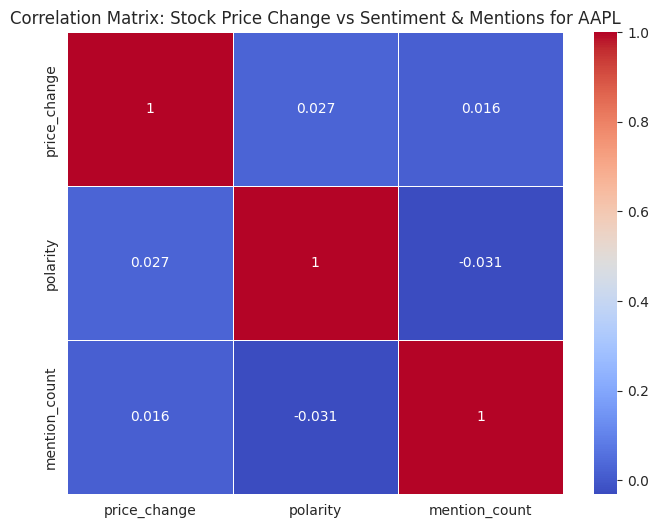

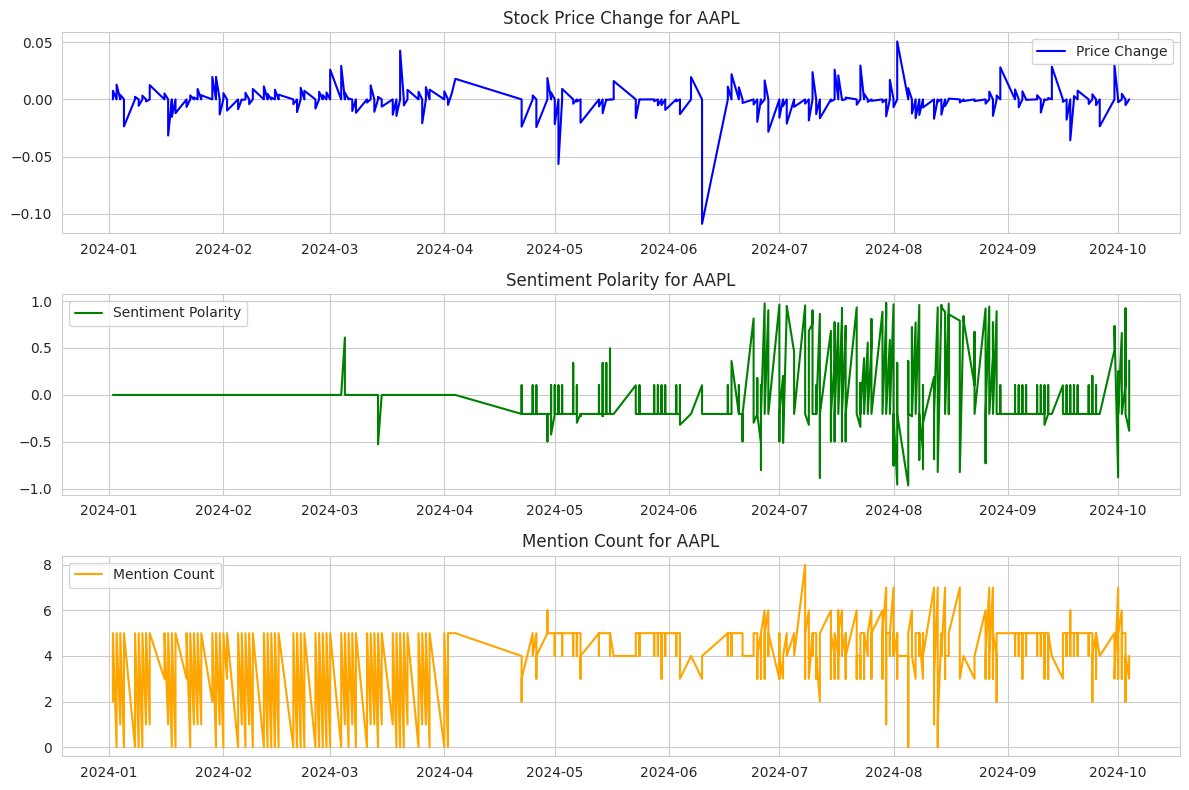

Processing data for TSLA...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


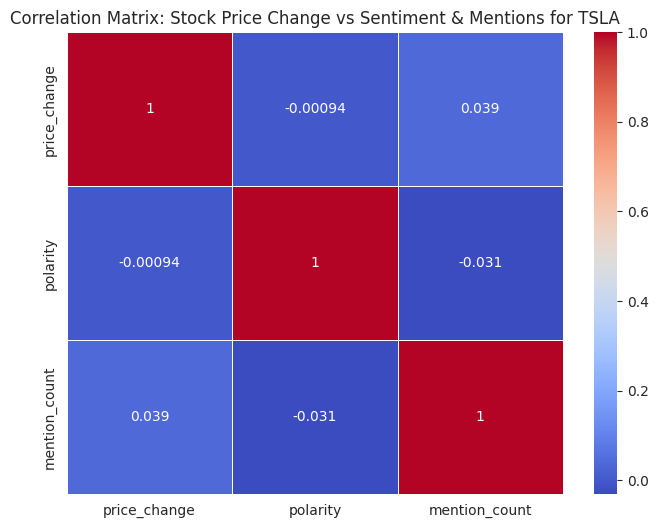

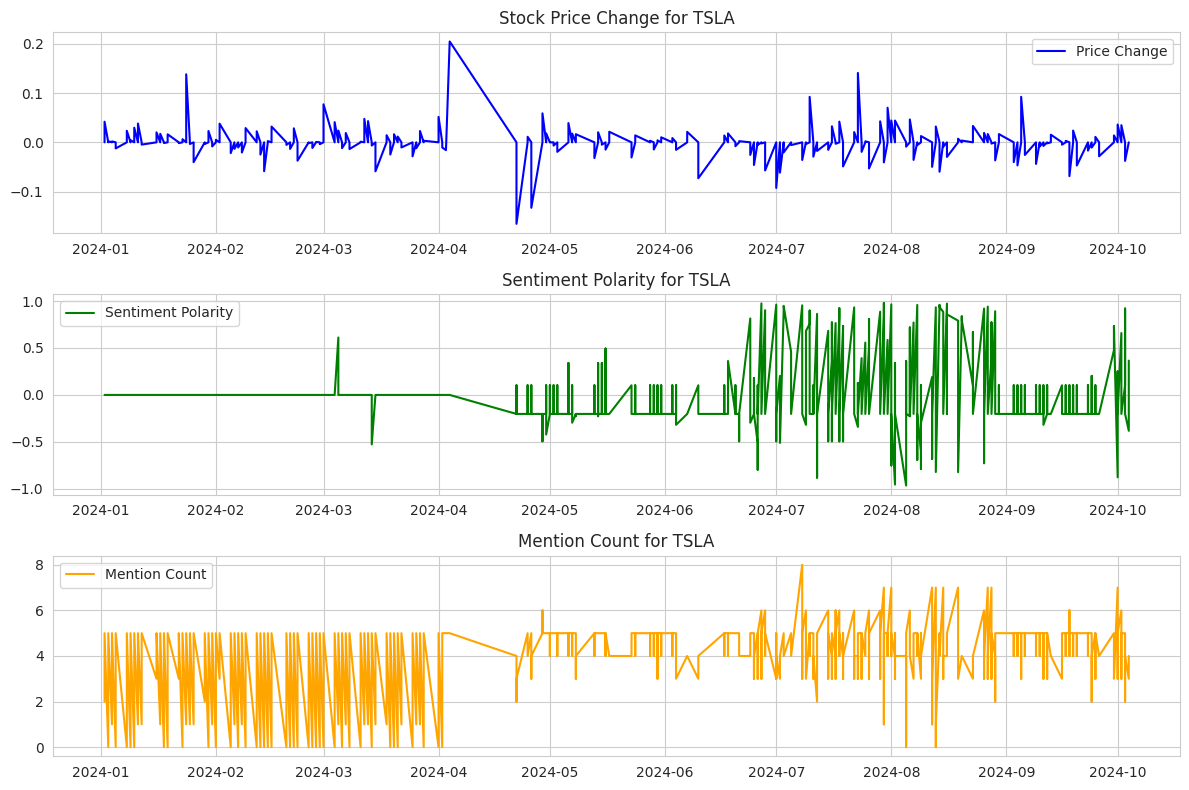

Processing data for GOOG...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


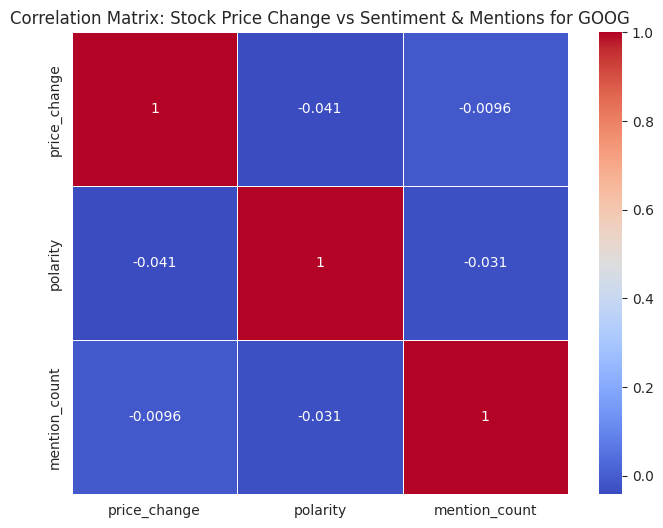

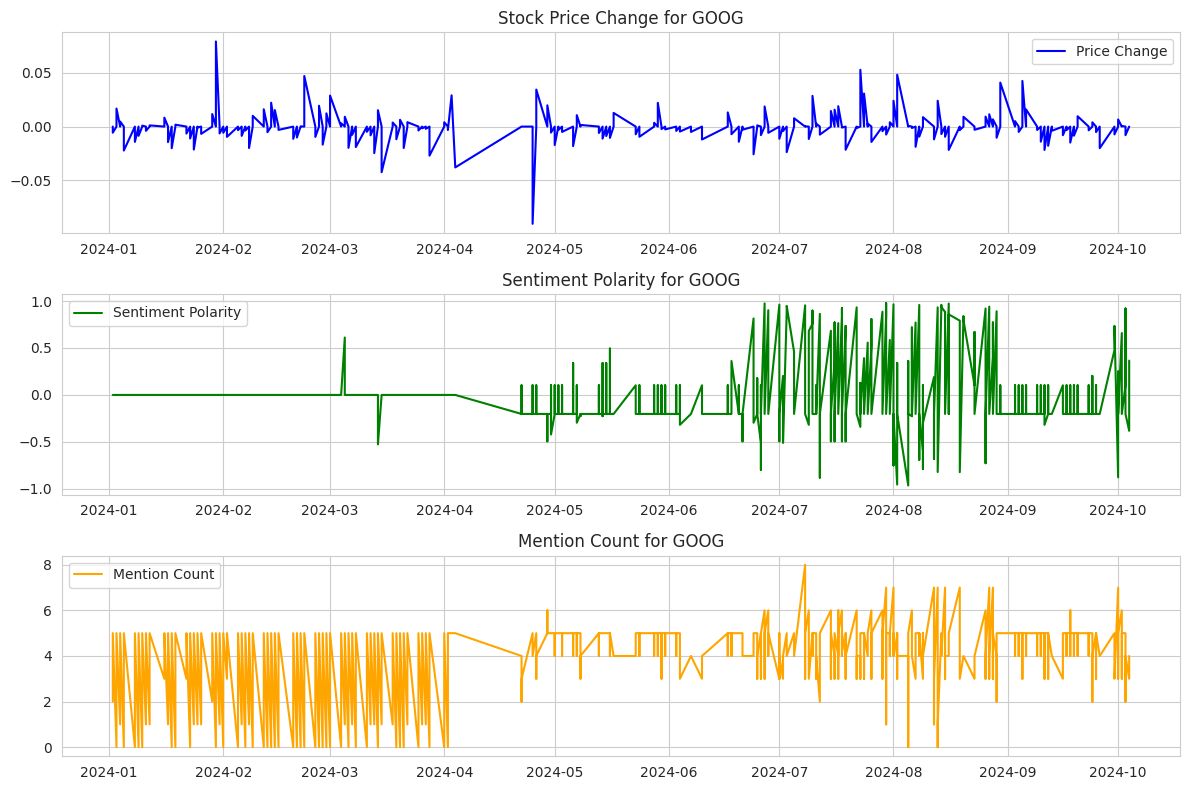

Processing data for MSFT...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


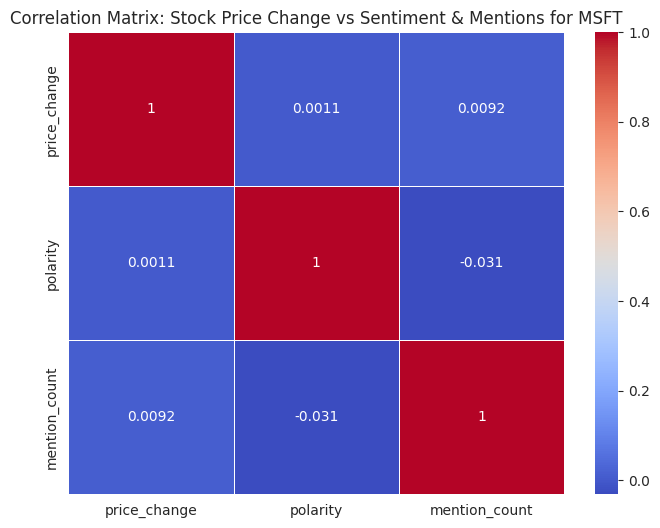

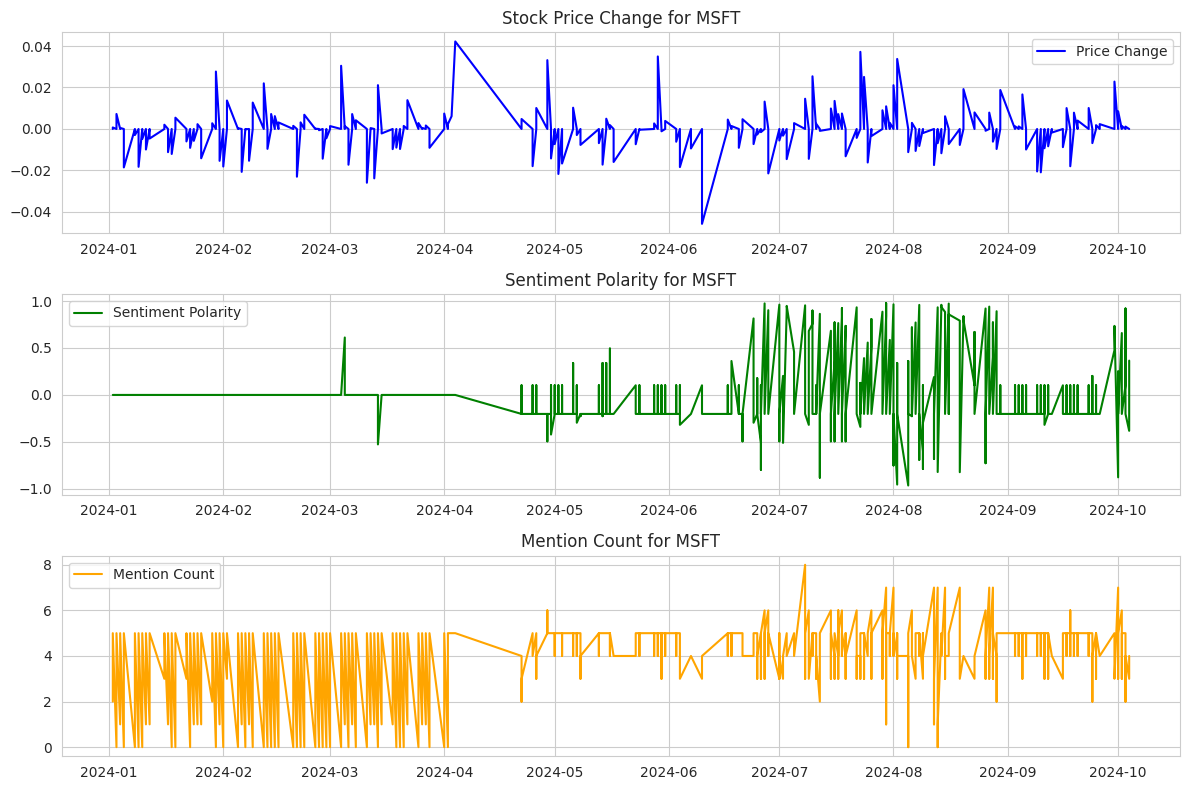

Processing data for AMZN...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


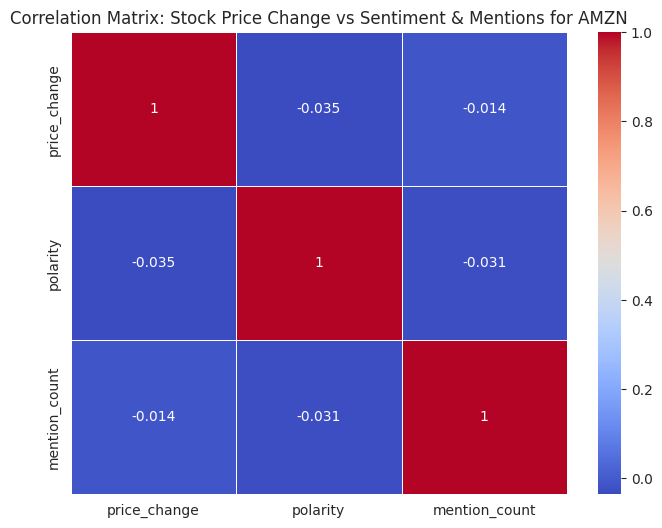

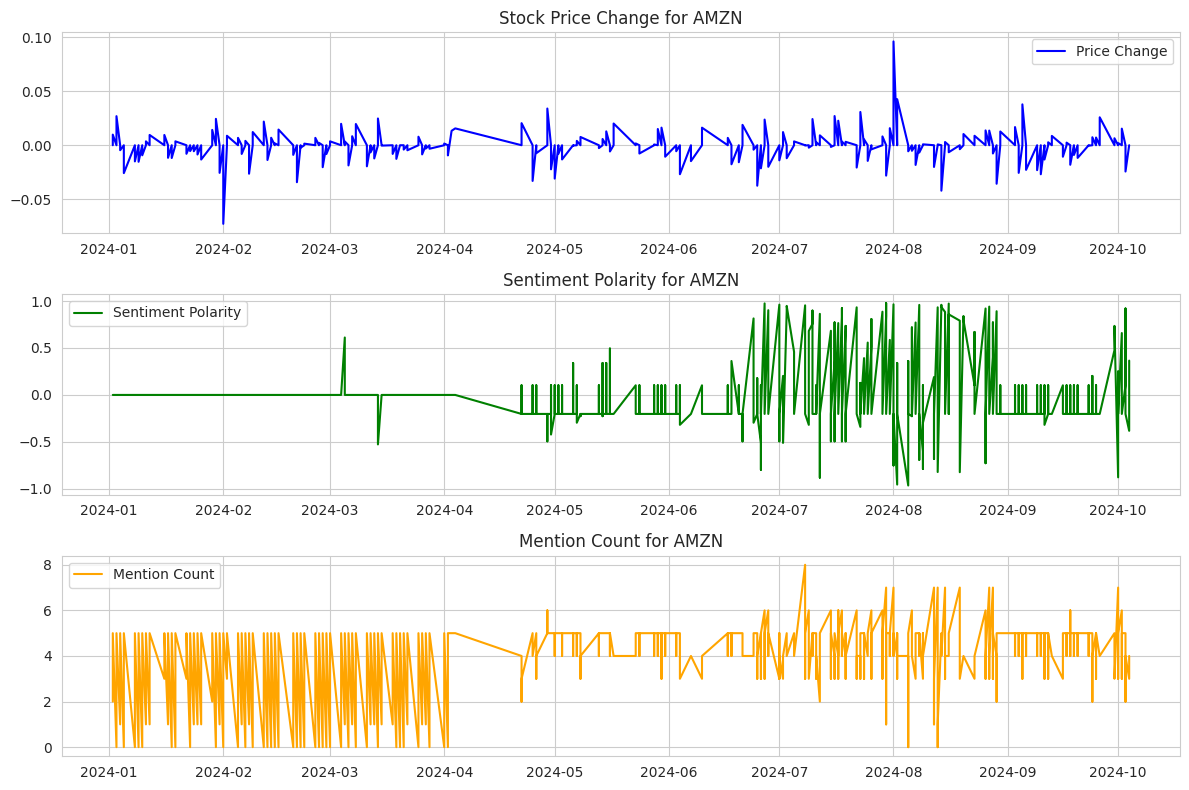

Processing data for RELIANCE...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RELIANCE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


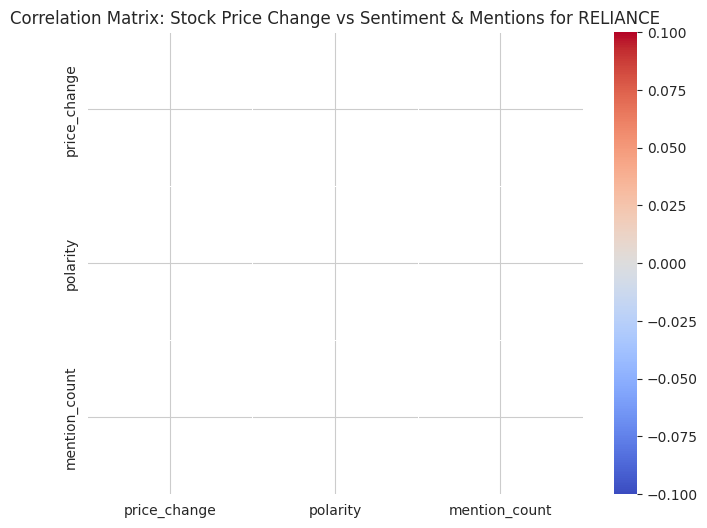

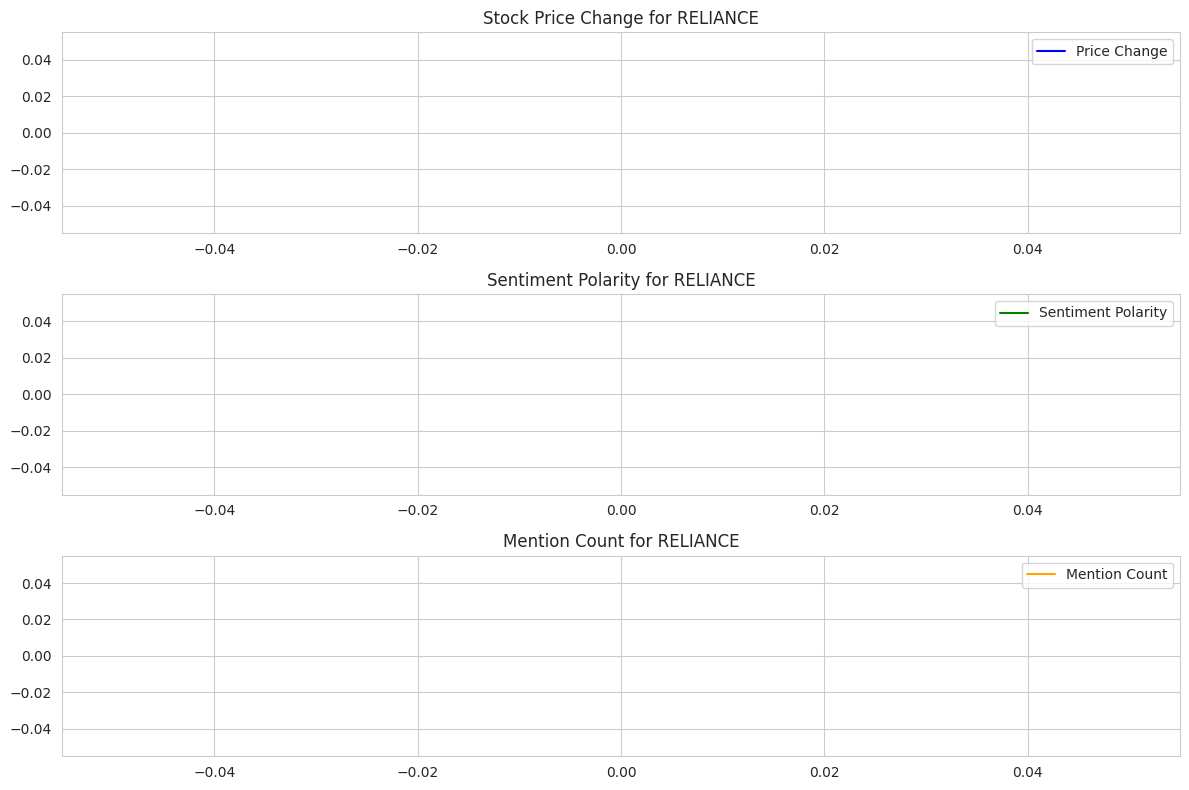

Processing data for TCS...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


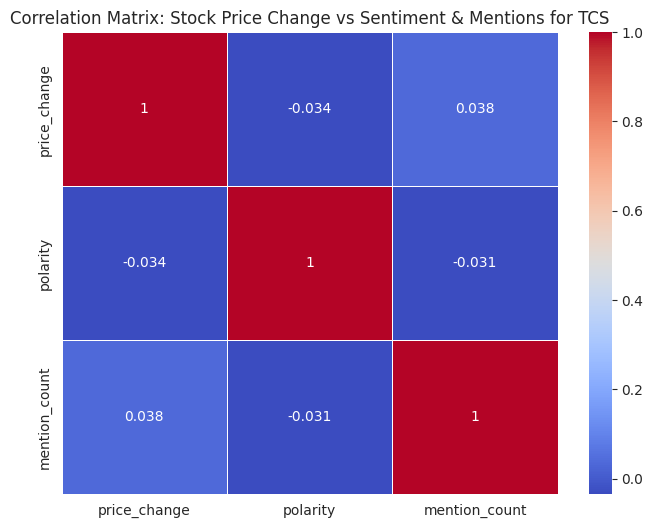

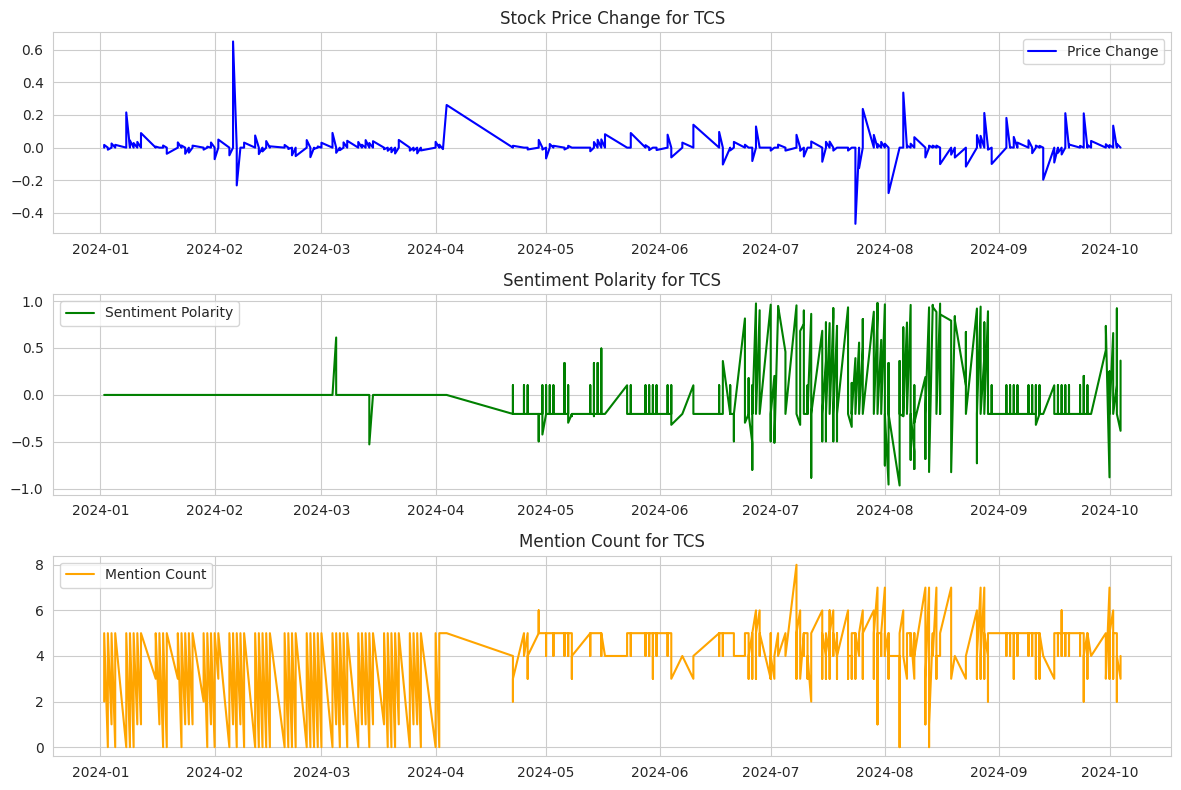

Processing data for VOW3...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOW3']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


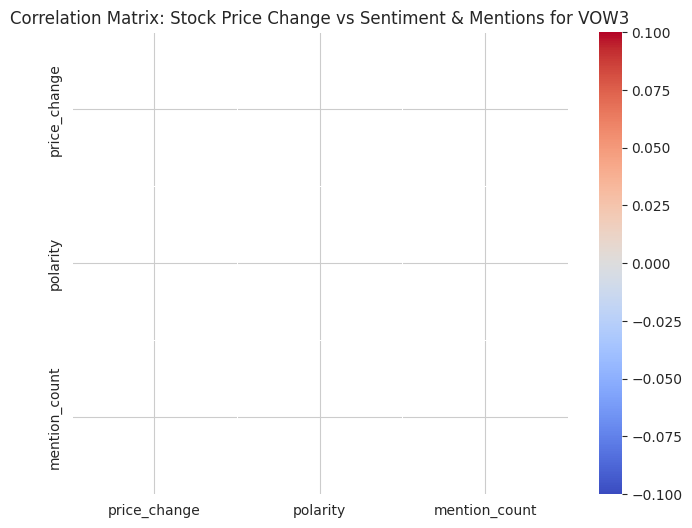

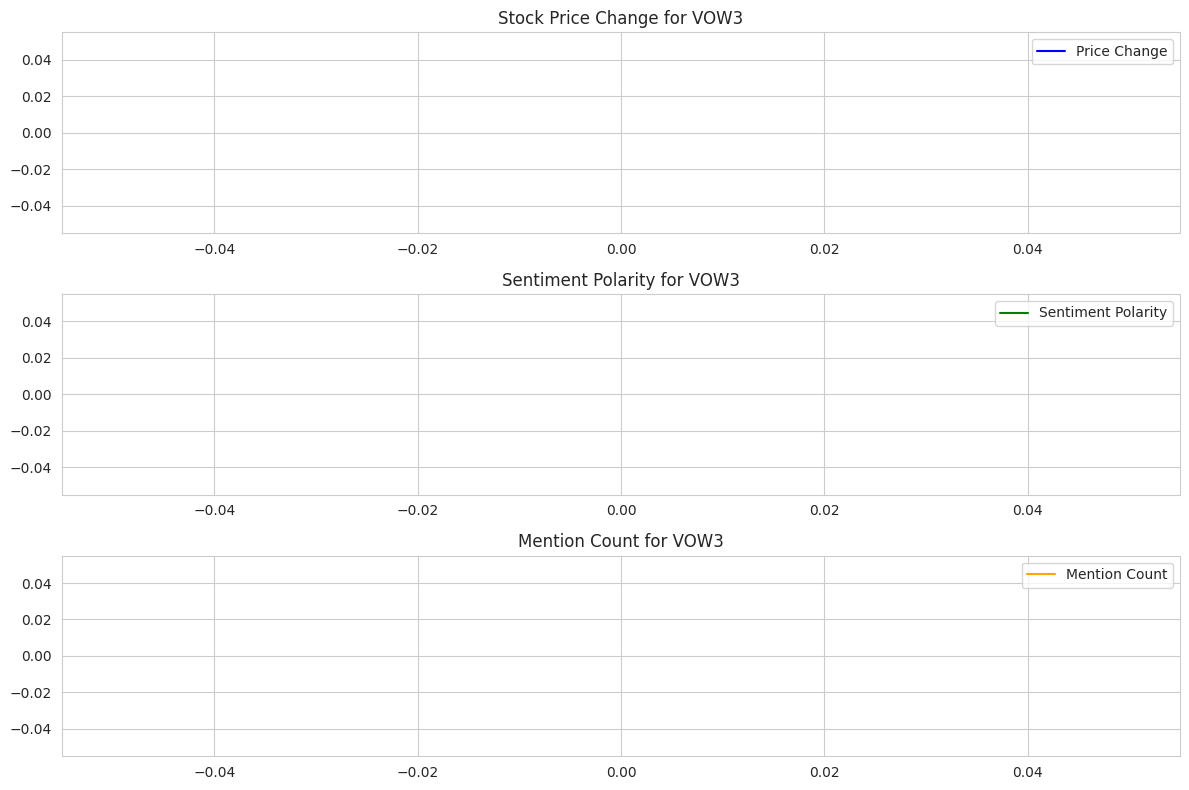

Processing data for BMW...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BMW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-10-5)')
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


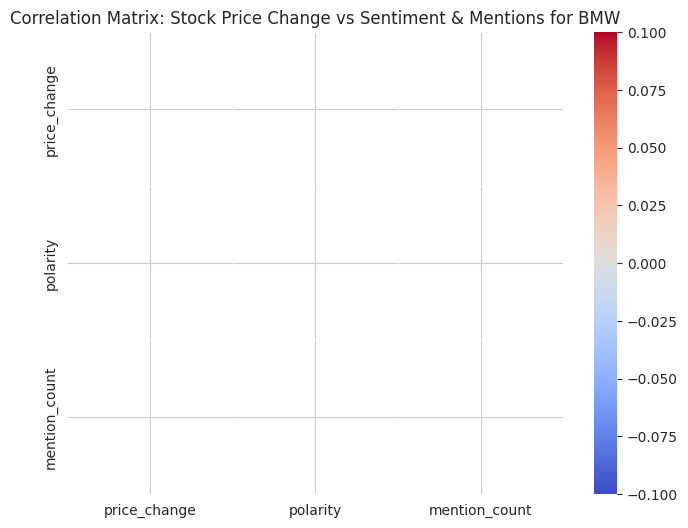

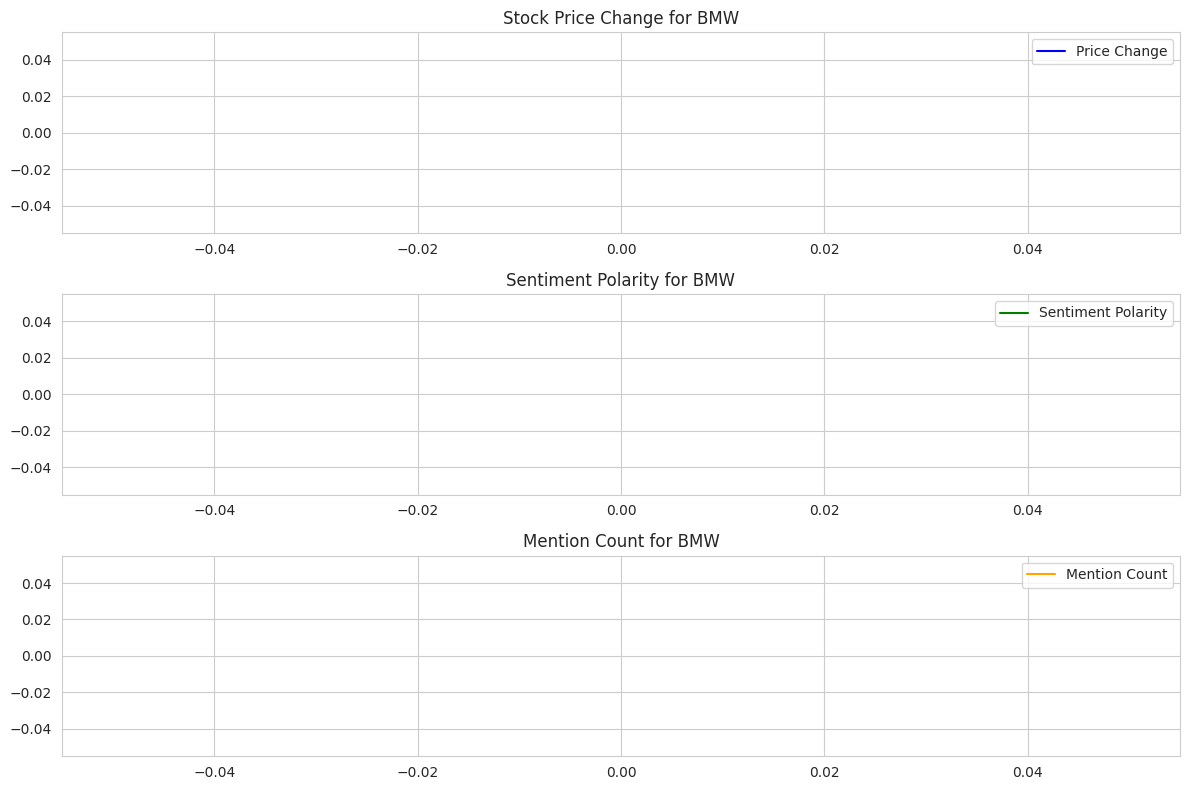

Processing data for NFLX...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


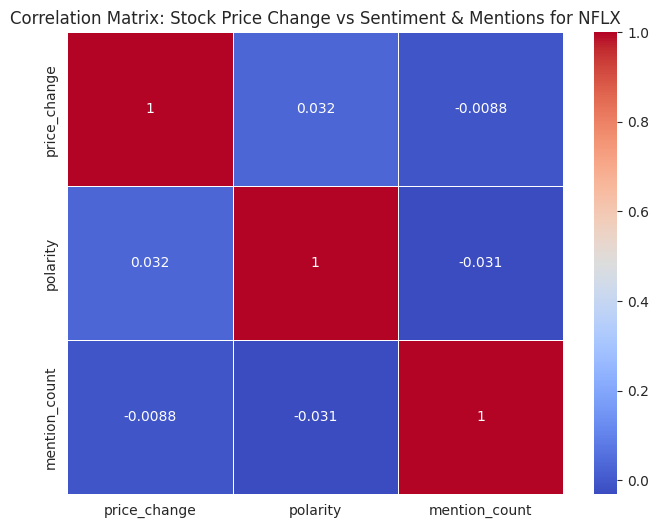

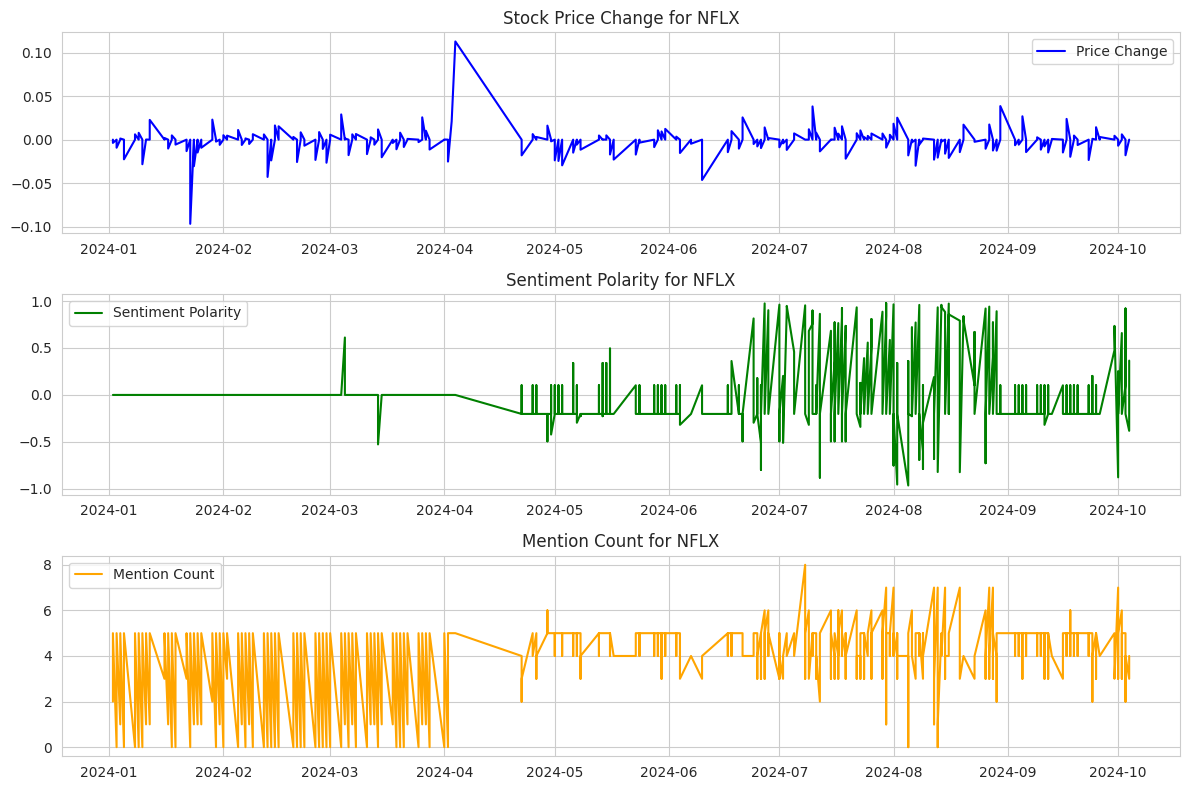

Processing data for PYPL...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


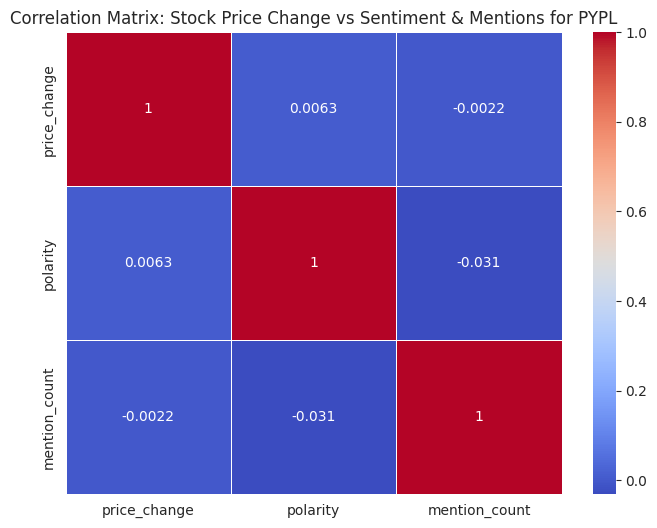

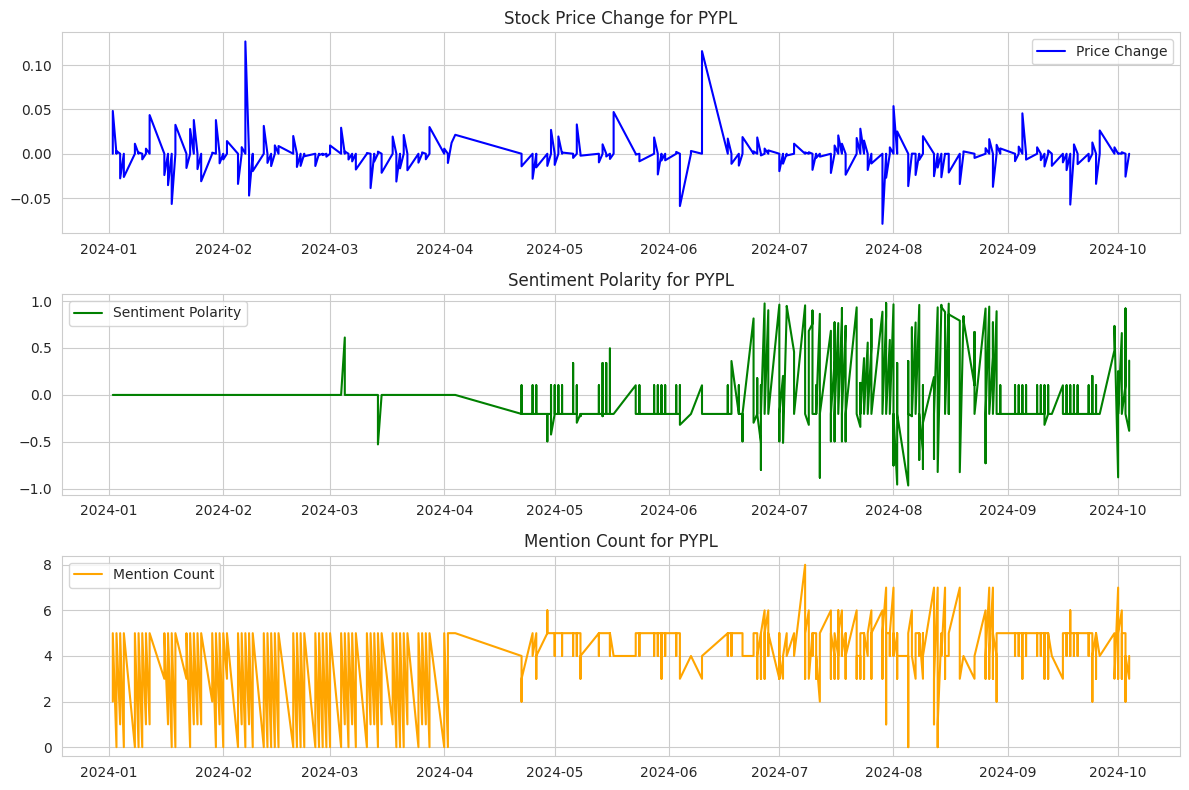

Processing data for NIO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-31-931c7fb2c4e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


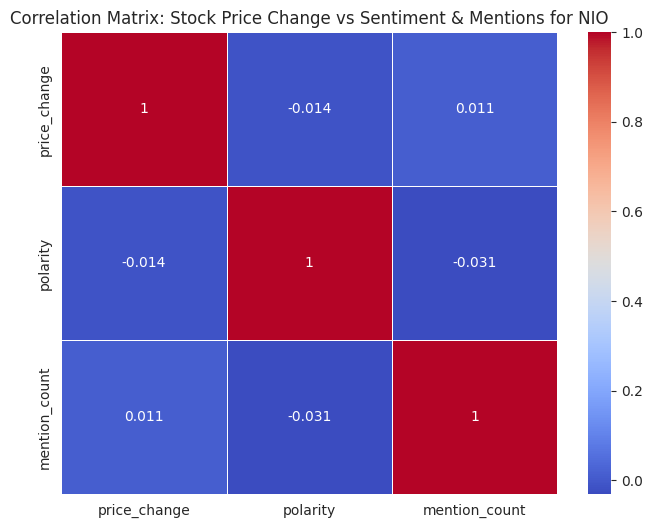

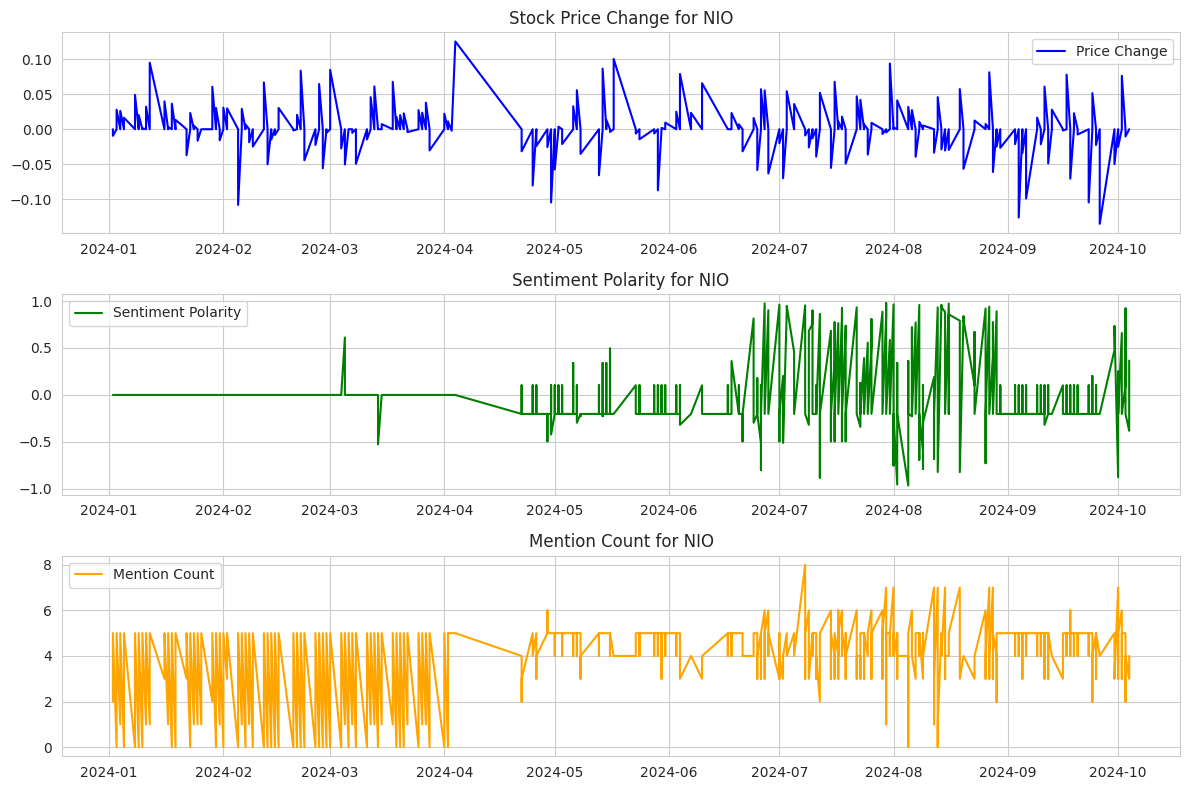

In [ ]:
# Loop through each stock symbol to fetch stock data, merge, and analyze
for stock_symbol in stock_symbols:
    print(f"Processing data for {stock_symbol}...")

    # Step 1: Fetch stock price data using yfinance
    stock_data = yf.download(stock_symbol, start='2024-01-01', end='2024-10-5')

    # Step 2: Clean and prepare stock price data
    stock_data = stock_data[['Adj Close']]  # Using the adjusted close price
    stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)

    # Step 3: Merge the stock price data with your sentiment data
    df_combined = pd.merge(df_messages, stock_data, how='inner', left_index=True, right_index=True)

     # Step 4: Calculate stock price changes (percentage)
    df_combined['price_change'] = df_combined['stock_price'].pct_change()

    # Step 5: Analyze correlations between stock price changes, sentiment, and mentions
    correlation_matrix = df_combined[['price_change', 'polarity', 'mention_count']].corr()

    # Step 6: Visualize the correlation matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f'Correlation Matrix: Stock Price Change vs Sentiment & Mentions for {stock_symbol}')
    plt.show()

    # Plot stock price movements, sentiment, and mentions over time
    plt.figure(figsize=(12,8))

    # Plot stock price changes
    plt.subplot(3, 1, 1)
    plt.plot(df_combined.index, df_combined['price_change'], color='blue', label='Price Change')
    plt.title(f'Stock Price Change for {stock_symbol}')
    plt.legend()

    # Plot sentiment polarity
    plt.subplot(3, 1, 2)
    plt.plot(df_combined.index, df_combined['polarity'], color='green', label='Sentiment Polarity')
    plt.title(f'Sentiment Polarity for {stock_symbol}')
    plt.legend()

    # Plot mention count
    plt.subplot(3, 1, 3)
    plt.plot(df_combined.index, df_combined['mention_count'], color='orange', label='Mention Count')
    plt.title(f'Mention Count for {stock_symbol}')
    plt.legend()

    plt.tight_layout()
    plt.show()

The below code resamples sentiment and mention data by day, calculating the average sentiment polarity and total mentions. It generates three visualizations: one showing trends in average daily sentiment, another displaying total daily mentions, and an optional combined plot that overlays both metrics for comparison. Each plot includes titles, axis labels, and grid lines for clarity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


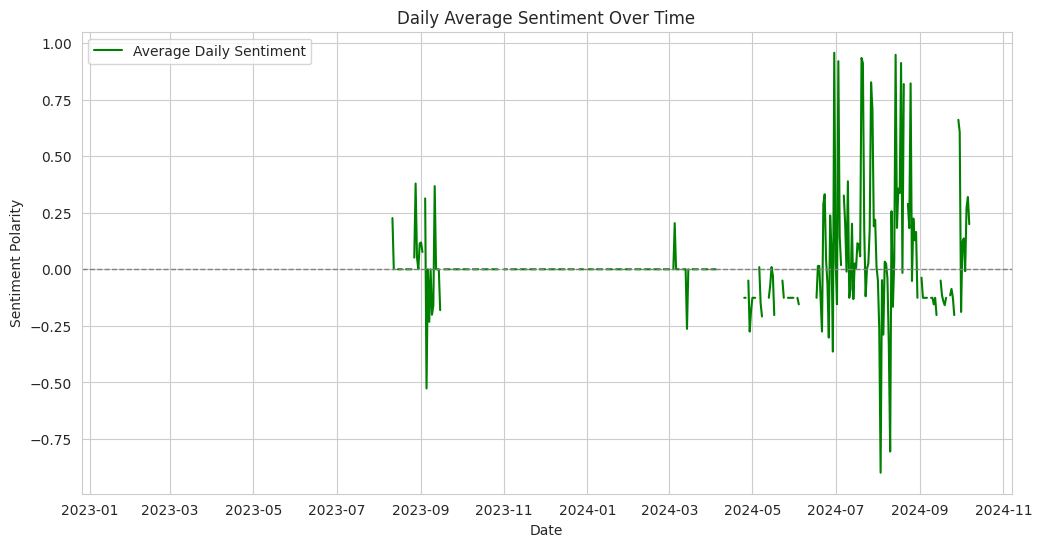

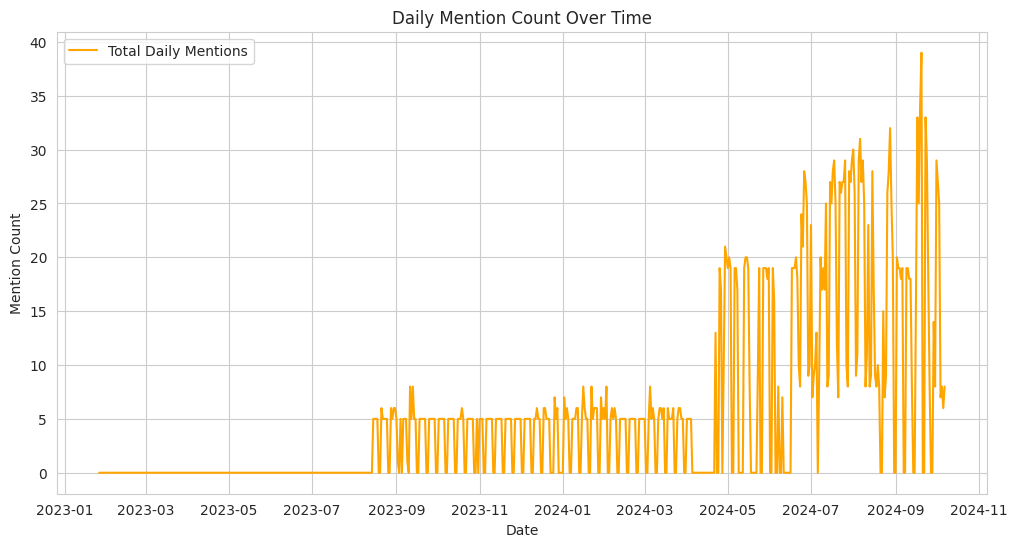

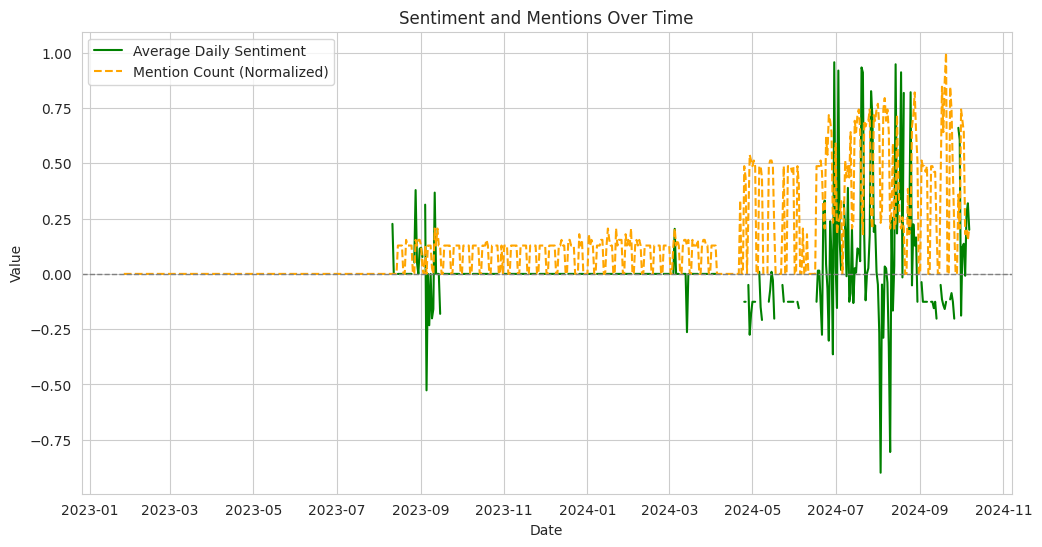

In [ ]:
# Resample the data by day and compute the average sentiment and total mentions
df_daily_trends = df_messages.resample('D').agg({
    'polarity': 'mean',  # Average daily sentiment
    'mention_count': 'sum'  # Total daily mentions
})

# Visualization 1: Trends in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Trends in mentions over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'], color='orange', label='Total Daily Mentions')
plt.title('Daily Mention Count Over Time')
plt.xlabel('Date')
plt.ylabel('Mention Count')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize both trends together
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'] / df_daily_trends['mention_count'].max(), color='orange', label='Mention Count (Normalized)', linestyle='--')
plt.title('Sentiment and Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()